# Probability project 
# KABEER AHMED SHABEER AHMED 
# 64230037 


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv("data.csv")  
data.head()    # showing the first 5 rows here



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
# checking for missing values now 
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

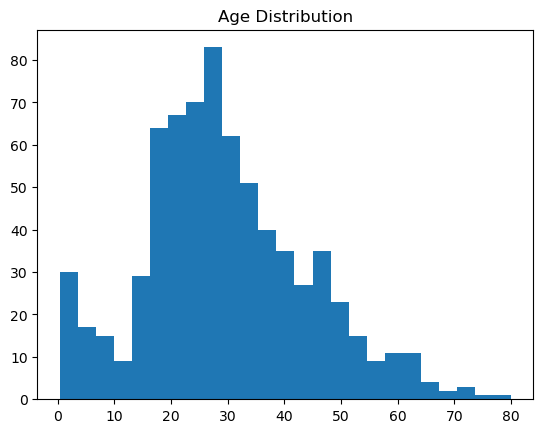

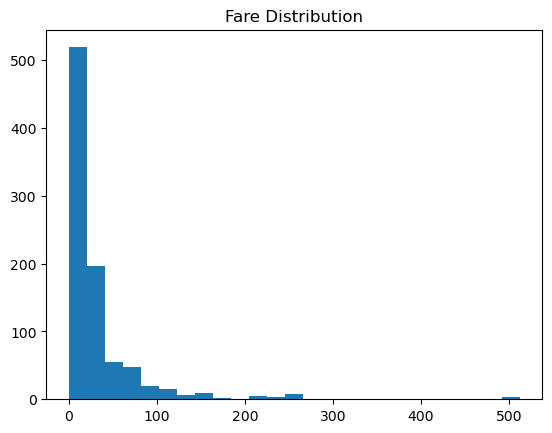

In [80]:
plt.hist(data['Age'].dropna(), bins=25)
plt.title("Age Distribution")
plt.show()

plt.hist(data['Fare'], bins=25)
plt.title("Fare Distribution")
plt.show()


# basically what professor told aboout skew-ness of graphsm, age is right skewed i.e more childeren or teens , and price is also righ skwed i.e low cost tickkets more , inturn more
# lower class people 

# classifying every feature as discrete or continuous randon variable

| Feature     | Type                           | Reason          |
| ----------- | ------------------------------ | --------------- |
| PassengerId | discrete                       | unique numbers  |
| Survived    | discrete                       | only 2 outcomes |
| Pclass      | discrete                       | only 3 classes  |
| Name        | N/A                            | NOT A NUMBER    |
| Sex         | discrete                       | male/female     |
| Age         | continuous                     | real-valueS     |
| SibSp       | discrete                       | countble        |
| Parch       | discrete                       | countable       |
| Ticket      | N/A                            | alphanumeric    |
| Fare        | continuous                     | any real value  |
| Cabin       | N/A                            | jumbled words   |
| Embarked    | discrete                       | only 3 values   |


# Part 2 
 
# 1. basically when modelling an expression like P(survived) = 1 is basically saying like what is the probability that this guy survives, and the formula is basically total number of survived divided by total number of died, so bacially avergae(mean).

# 2. basically we first gotta make the rowws where sex is female into boolean and then we take the filtered rows and form that we select the survvived column , therefore we get the rows wwhere its women , who have survived and then apply mean to it whihc gives their surviving probability , same can be applied for males as well

# 3. basically we first gotta isolate the rows with class, then we count how many people in each class then normalize it by dividing with entire rows, by this we can get proportion oof classes , i.e the probability distribution system , then we can compute the mean and variance accordingly


In [81]:
prob_of_survival = data['Survived'].mean()
prob_of_survival

# 0.38 basically means 38% surviving rate overall

0.3838383838383838

In [82]:
prob_of_survival_given_female = data[data['Sex'] == 'female']['Survived'].mean()
prob_of_survival_given_male = data[data['Sex'] == 'male']['Survived'].mean()


prob_of_survival_given_female = prob_of_survival_given_female * 100
prob_of_survival_given_male = prob_of_survival_given_male * 100
print("survival of female % = {}% and for male is % =  {}%".format(prob_of_survival_given_female,prob_of_survival_given_male)) 


# here female survival is approx 74 percent and male is a measly approx 18% hence re affirming the saying 
# " WOMEN AND CHILDREN FIRST !"


survival of female % = 74.20382165605095% and for male is % =  18.890814558058924%


In [83]:
person_class_pdf = data['Pclass'].value_counts(normalize=True)
person_class_pdf

print(" these are the relative proportions of seats in different classes")
x,y,z = person_class_pdf
# small thing to note after messing up here is that the order is in 3 1 2 , therefore upper class is y , 2nd class is z and 3rd class is x
print(" the proportioon of seats in 1st class was {}%".format(y*100))
print(" the proportion of seats in the 2nd class  was {}% ".format(z*100))
print(" the proportion of seats in the 3rd class  was {}% ".format(x*100))

# here we can see that maximum people were from the 3rd class 

# expectation operation is basically mean, we need to coompute the expectation and variance of the classes , in oother words basically we can knoow that when pickked an random
# person wwhat his class could be, we can do this by multiplying each probability by its factor therefore normalizing the curve and then adding them up, similarly we can see 
# for variance , its basically is telling howw sprread the classes are and where clustering (if happening) happens

expected_person_class = ((person_class_pdf.index) * (person_class_pdf.values))
expected_person_class_value = 0
for i in expected_person_class:
    expected_person_class_value+=i

expected_person_class_value

# here we can see that the avegae person had a second or third class ticket

E_X = expected_person_class
E_X2 = (person_class_pdf.index**2 * person_class_pdf.values)
E_X2_value = 0
E_X_value = 0
for i in E_X2 :
    E_X2_value+=i
for i in E_X:
    E_X_value+=i
variance_person_class = E_X2_value - E_X_value**2

variance_person_class

# here it is 0.69 which ius 69 percent apprx, it also tell us that it is right skewed if we make the x axis as the class , as the clustering seems to happen nearr the second and third class


 these are the relative proportions of seats in different classes
 the proportioon of seats in 1st class was 24.242424242424242%
 the proportion of seats in the 2nd class  was 20.65095398428732% 
 the proportion of seats in the 3rd class  was 55.106621773288445% 


0.6982305912347062

## computing continous random variables


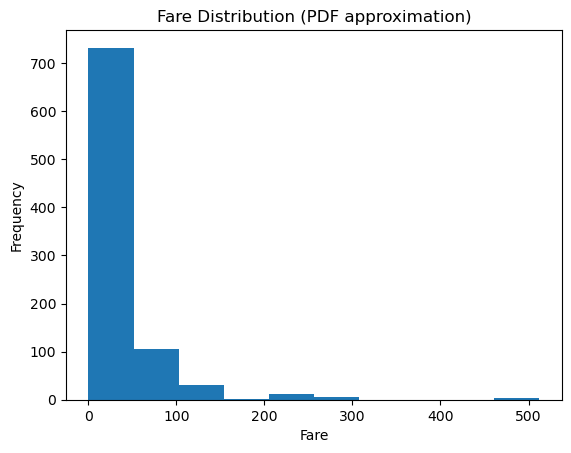

In [84]:
plt.hist(data['Fare'], bins=10)
plt.title("Fare Distribution (PDF approximation)")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

# clearly shows more people bought lower price tickets , but some people literally paid exooorbitant amoounts

In [85]:
# to coompute the probability (20 les than fare less than 100), we gotta filter only the rows with fare between 20 and 100 and then take their count and divide by total count
person_fare_range = data[(data['Fare'] > 20) & (data['Fare'] < 100)].shape[0] / len(data)
person_fare_range * 100

## i.e approx 36% people paid between 20 and 100, which could indicate most of the 36% were from lower class econmically

36.25140291806959

In [86]:
## counter intuitive questions
person_survival_class1 = data[data['Pclass'] == 1]['Survived'].mean()
person_survival_class3 = data[data['Pclass'] == 3]['Survived'].mean()

person_survival_class1, person_survival_class3

# here it definitely tell us that people from upper class that surived had an approx 38% moore chances, i.e their chances of survival was 62 percent comapared to 24 percent of lower class
# which basically tells us that upperclass people had more priority and access to lifebaots




(0.6296296296296297, 0.24236252545824846)

In [87]:
children = data[data['Age'] < 10]['Survived'].mean()
elderly = data[data['Age'] >= 50]['Survived'].mean()

children, elderly

# this basically confirms the theory of " WOMEN AND CHILDREN FIRST " because the prob of surviving at the age less than 10 is 61% whihc is higher than 36% for elderly

(0.6129032258064516, 0.36486486486486486)

# Part 3 

In [88]:
data[['Age', 'Fare', 'SibSp', 'Parch']].describe()


# the mean age is 29 , mean fare is 32 , mean sibsp approx 1 , and mean parch approx 0.8 

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [89]:
data[['Sex', 'Pclass', 'Embarked']].describe(include='all')


,Sex,Pclass,Embarked
count,891,891.000000,889
unique,2,NaN,3
top,male,NaN,S
freq,577,NaN,644
mean,NaN,2.308642,NaN
std,NaN,0.836071,NaN
min,NaN,1.000000,NaN
25%,NaN,2.000000,NaN
50%,NaN,3.000000,NaN
75%,NaN,3.000000,NaN


In [90]:
data_corr = data[['Survived', 'Age', 'Fare', 'Pclass']].corr()
data_corr

# here bascially if you look at survived vs pclass , its in negative which means the lower urr class , the lower is ur survivability rate, the same goes for fare, high fare mean more su
# -urvivability

,Survived,Age,Fare,Pclass
Survived,1.000000,-0.077221,0.257307,-0.338481
Age,-0.077221,1.000000,0.096067,-0.369226
Fare,0.257307,0.096067,1.000000,-0.549500
Pclass,-0.338481,-0.369226,-0.549500,1.000000


In [91]:
# training preprocessing and testing

# preprocessing
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Age'] = data['Age'].fillna(data['Age'].median())
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']


In [103]:
# training and testing splits

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(" Accuracy is {}".format(accuracy))

print(" ConfusionMatrix  is {}".format(cm))



# thereofre accuracy of the model is aaapprox 80% wwhich is fine

 Accuracy is 0.7947761194029851
 ConfusionMatrix  is [[134  23]
 [ 32  79]]


# what does Y_prob represent ?

its basically telling the proobability of oof survival given a set of features like sex age class etc

# why a lot of uncertainty ?

because the data is really messy and has a lot of noise and therefoore cannoot be accurately measured hence the uncertainty

# model success

the model can accurately determine 80% of the time, so it is 80% successfull

# accuracy meaning
here model accuracy means how accurate can the model predict the survivability given a set of features